# Imports + Load data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [3]:
sns.set(rc={'figure.figsize':(20,16)})
sns.set_style("darkgrid")

In [4]:
hotel_reservations = pd.read_csv("Hotel_Reservations.csv")

# First checks

## First look at data & at the different features

In [5]:
(observations, features) = hotel_reservations.shape

print(f"There are {observations} and {features} in this dataset.")

There are 36275 and 19 in this dataset.


In [6]:
pd.get_dummies(hotel_reservations[["booking_status"]])["booking_status_Canceled"].mean()

0.32763611302549966

It seems that the dataset is a little bit unbalanced as 32% of the reservations were canceled.

In [7]:
display(hotel_reservations.head())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
hotel_reservations.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [9]:
hotel_reservations.isna().sum().sum()

0

In [10]:
hotel_reservations["arrival_year"].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

This dataset has observations for reservations between 2017 and 2018, although most observations come from reservations made for 2018.

# Numerical Variables 

In [11]:
numeric_columns = hotel_reservations.columns[hotel_reservations.dtypes !="object"] #features encoded as numerical objects

In [12]:
to_describe_numeric_columns = numeric_columns.drop(["arrival_month", "arrival_year", "arrival_date"]) # Remove numerical features
# for which classical descriptive statistics make no sense

to_describe_numeric_columns = to_describe_numeric_columns.drop(["required_car_parking_space", "repeated_guest"]) #set aside binary variables as well

In [13]:
hotel_reservations[to_describe_numeric_columns].describe().drop("count").transpose() # Display descriptive statistics for remaining features

,mean,std,min,25%,50%,75%,max
no_of_adults,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
lead_time,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
no_of_previous_cancellations,0.023349,0.368331,0.0,0.0,0.00,0.0,13.0
no_of_previous_bookings_not_canceled,0.153411,1.754171,0.0,0.0,0.00,0.0,58.0
avg_price_per_room,103.423539,35.089424,0.0,80.3,99.45,120.0,540.0
no_of_special_requests,0.619655,0.786236,0.0,0.0,0.00,1.0,5.0


These descriptive statistics give us an idea about the profile of the clients and the characteristics of the reservations.

### Correlation between numerical features

In [14]:
correlation_matrix = hotel_reservations[to_describe_numeric_columns].corr()

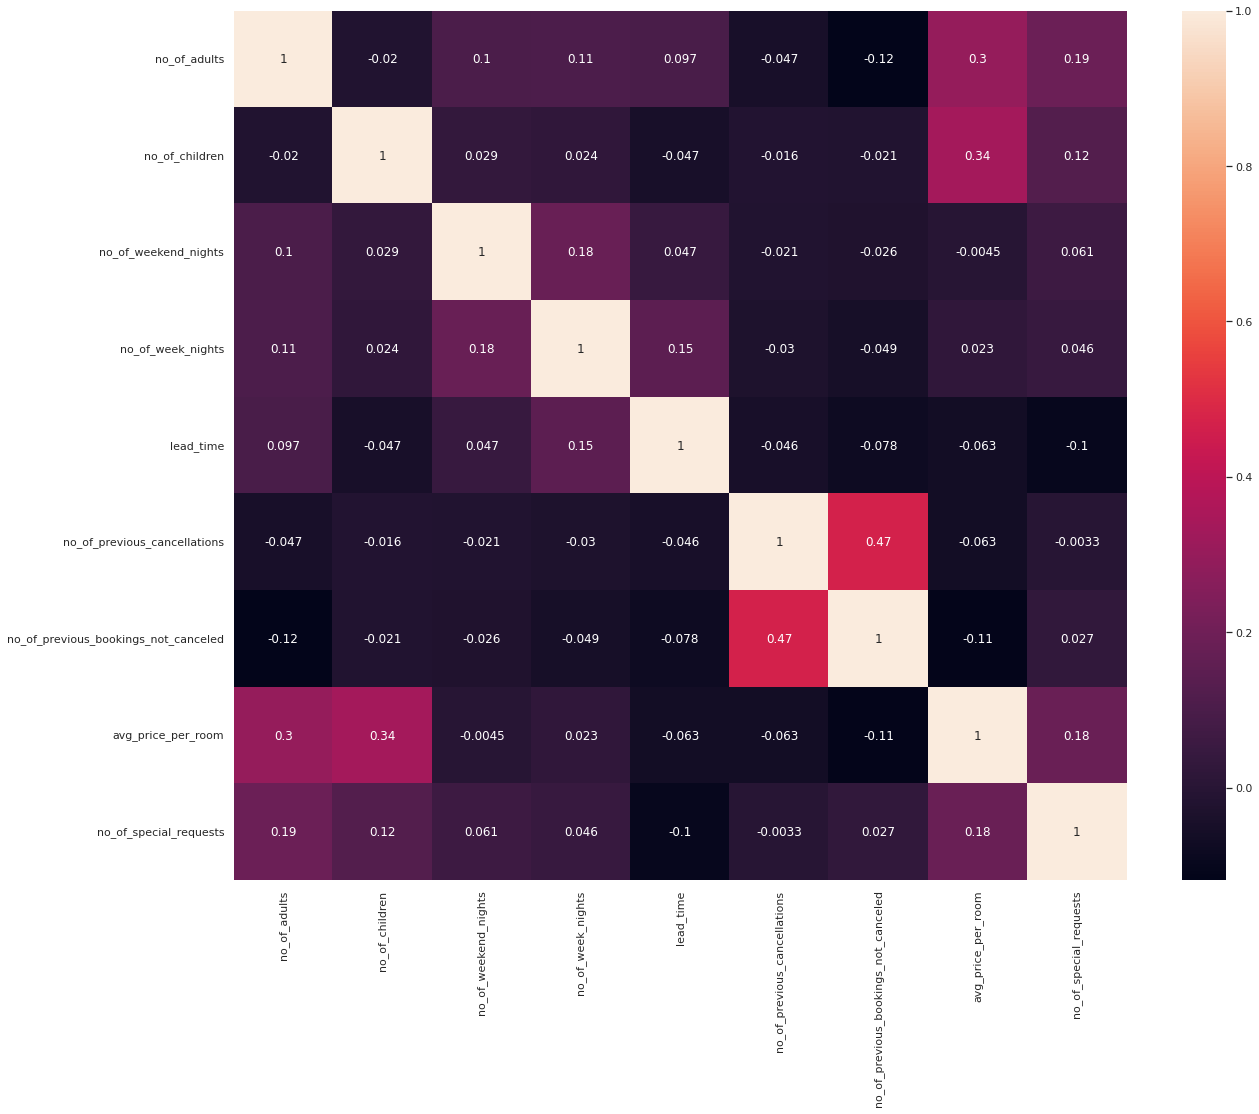

In [15]:
sns.heatmap(correlation_matrix, annot = True)

It seems that the numerical features are mostly not strongly correlated.

### Relationship between numerical features and target variable

In [16]:
numerical_features_df = hotel_reservations[to_describe_numeric_columns]
numerical_features_df = (numerical_features_df- numerical_features_df.mean()) / numerical_features_df.std()

In [17]:
numerical_features_df["booking_status"] = hotel_reservations["booking_status"]
numerical_features_df = pd.get_dummies(numerical_features_df, columns = ["booking_status"], drop_first = True)

In [18]:
numerical_features_df["booking_status_Canceled"] = 1-numerical_features_df["booking_status_Not_Canceled"]
numerical_features_df.drop("booking_status_Not_Canceled", axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:224: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


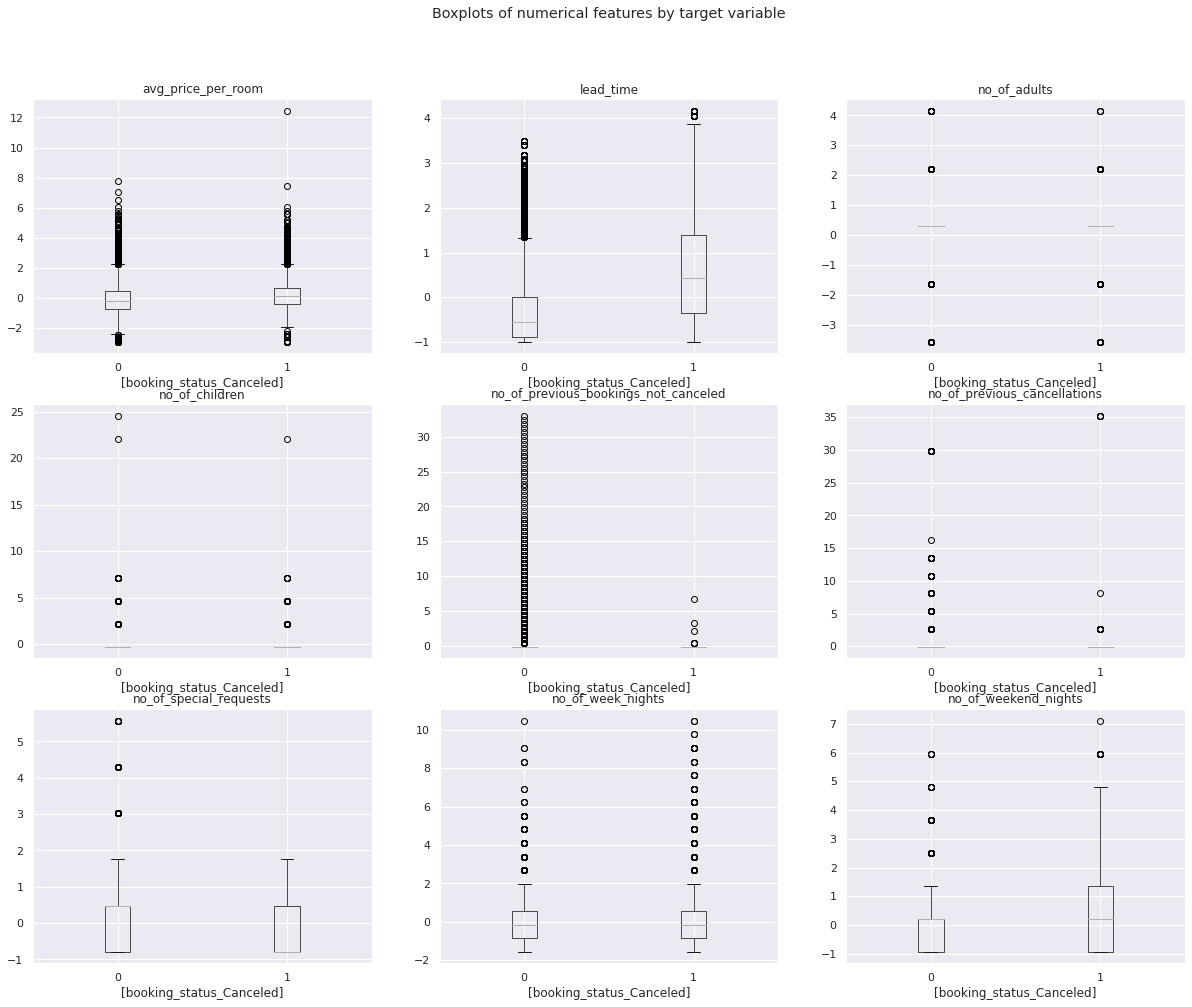

In [19]:
fig, ax_new = plt.subplots(3,3, sharey=False)
bp = numerical_features_df.boxplot(by="booking_status_Canceled",ax=ax_new,layout=(3,3))
fig.suptitle('Boxplots of numerical features by target variable')
plt.show()

# Categorical Variables

## Distribution of reservations over time of the year

Let's have a look at the distribution of the reservations over each month of the year as this might prove to be an informative feature : reservations made during off-season for example might be related to work and therefore might have less chances to be canceled.

It seemed from the number of observations that we had less data for the year 2017. A plot of the distribution of the reservations made in 2017 available in the data does show that we are missing the reservations made in the first half of 2017.

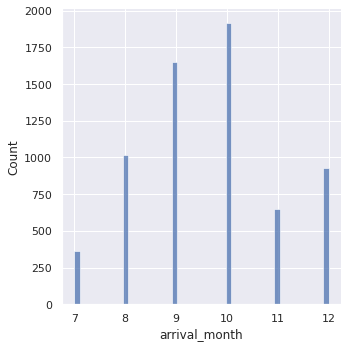

In [20]:
sns.displot(hotel_reservations.loc[hotel_reservations["arrival_year"]==2017,"arrival_month"])

To have a more meaningful distribution of the reservations over time, we only account for the reservations made in 2018.

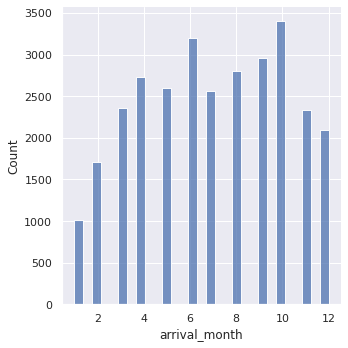

In [30]:
sns.displot(hotel_reservations.loc[hotel_reservations["arrival_year"]==2018,"arrival_month"])

It looks like there are fewer reservations made at the start of the year, and that June and October are the months with the most reservations.

### % of Cancelations per month of the year

In [22]:
cancelations_2018 = pd.get_dummies(hotel_reservations.loc[hotel_reservations["arrival_year"]==2018,["arrival_month","booking_status"]], columns = ["booking_status"], drop_first = True)

In [23]:
nb_cancelations_per_month = cancelations_2018.groupby("arrival_month").sum().reset_index()
nb_reservations_per_month = cancelations_2018.groupby("arrival_month").count().reset_index().rename({"booking_status_Not_Canceled":"nb_bookings"}, axis = 1)

In [24]:
perc_cancelations_per_month = nb_cancelations_per_month.merge(nb_reservations_per_month, on = "arrival_month")

In [25]:
perc_cancelations_per_month["perc_cancelations"] = (perc_cancelations_per_month["nb_bookings"] - perc_cancelations_per_month["booking_status_Not_Canceled"])/perc_cancelations_per_month["nb_bookings"]

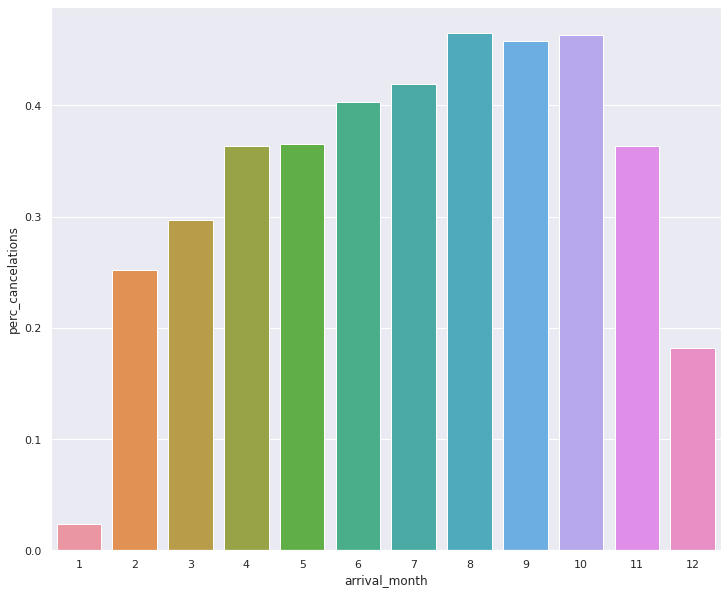

In [37]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(data = perc_cancelations_per_month, x = "arrival_month", y = "perc_cancelations")

It seems that almost none of the reservations made for January and December 2018 were cancelled, it might be related to the Christmas & New Year period. 

## Required car space

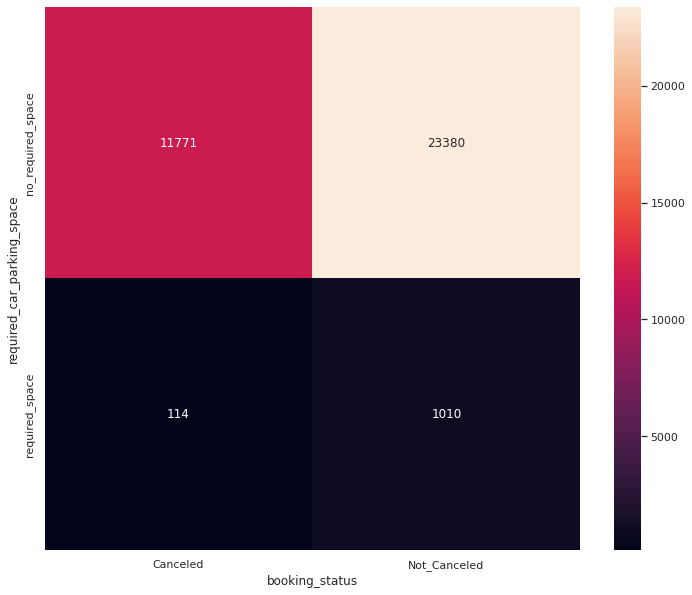

In [40]:
sns.heatmap(pd.crosstab(index = hotel_reservations["required_car_parking_space"].replace({1:"required_space", 0:"no_required_space"}), columns = hotel_reservations["booking_status"]), annot = True, fmt = "g")

The cancellation rate of guests which require car space is lower than that of guests which do not require car space. 

This might be due, among other things, to reservations made by tourists for holidays being less likely to be canceled, especially if they are made by guests who have children, as they would be hard to reschedule / replace ; and to tourists being more likely to come by car (as it would make it easier to visit the area).

## Repeated guest

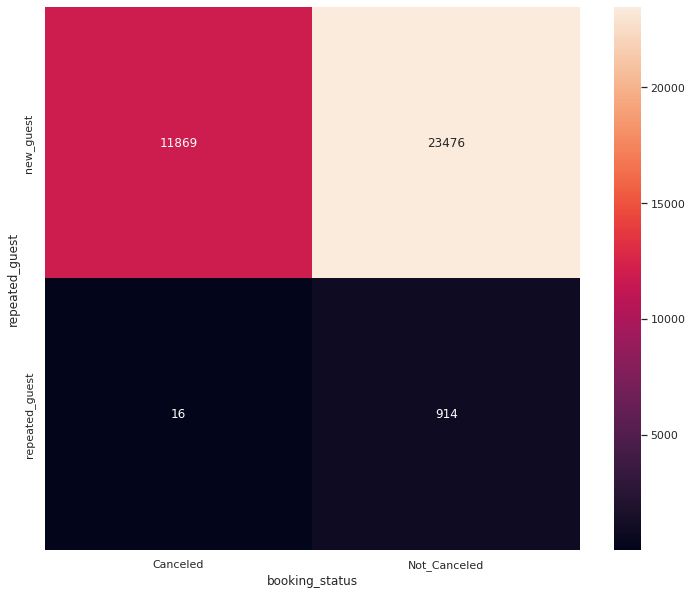

In [41]:
sns.heatmap(pd.crosstab(index = hotel_reservations["repeated_guest"].replace({0:"new_guest",1:"repeated_guest"}), columns = hotel_reservations["booking_status"]), annot = True, fmt = "g")

As expected, it seems like repeated guest are less likely to cancel their bookings which is intuitive. 


## Room type reserved

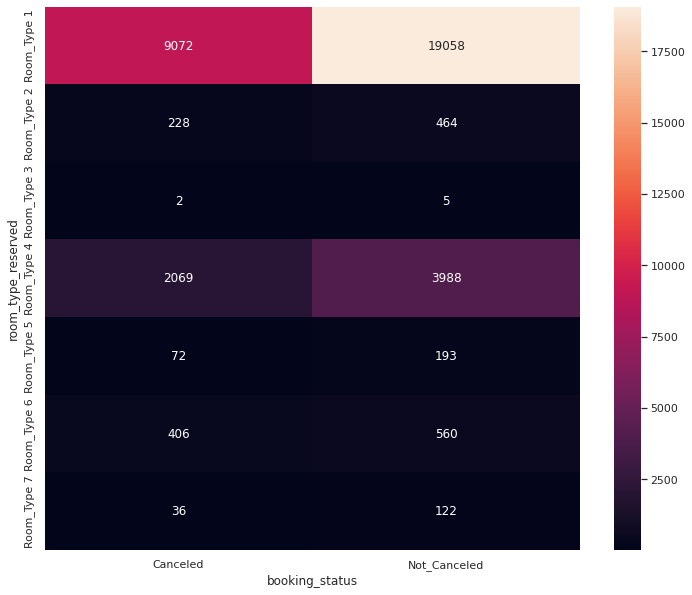

In [42]:
sns.heatmap(pd.crosstab(index = hotel_reservations["room_type_reserved"], columns = hotel_reservations["booking_status"]), annot = True, fmt = "g")

There is nothing too apparent from the room type reserved.

# Meal Plan

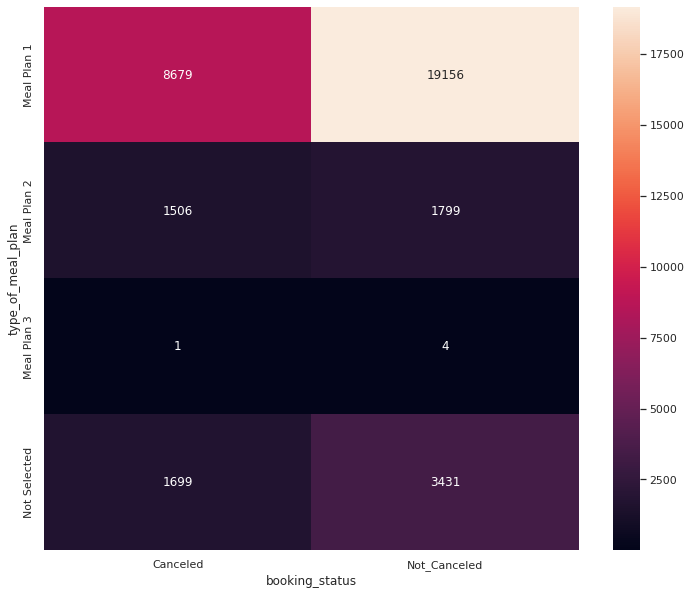

In [43]:
sns.heatmap(pd.crosstab(index = hotel_reservations["type_of_meal_plan"], columns = hotel_reservations["booking_status"]), annot = True, fmt = "g")

There is nothing too apparent from the type of meal plan